In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# set the ANS baroreflex parameters
models["Ans"].heart_rate_ref = 140.0
models["Ans"].min_baro = 20.0
models["Ans"].set_baro = 57.5
models["Ans"].max_baro = 110.0
# maximum effect on heart rate with hypotension = (min - set) * gain = (20 - 57.5) * -1.48 = 55.5 + ref = max hr 195.5
# maximum effect on heart rate with hypertension = (max - set) * gain = (110 - 57.5) * -1.48 = -48.1 + ref = min hr 62.
models["Ans"].g_map_hp = -1.48              
models["Ans"].tc_map_hp = 2.0
# maximum effect is 10% volume change of the venous reservoir
# maximum effect on venpool with hypotension = (min - set) = -37.5 -> u_vol smaller by 10% = -0.1 -> gain 0.002667
# maximum effect on venpool with hypertension = (max - set) = 37.5 -> u_vol larger by 10% = 0.1   -> gain 0.002667
models["Ans"].g_map_ven_pool = 0.02667              
models["Ans"].tc_map_ven_pool = 30.0

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
#neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.


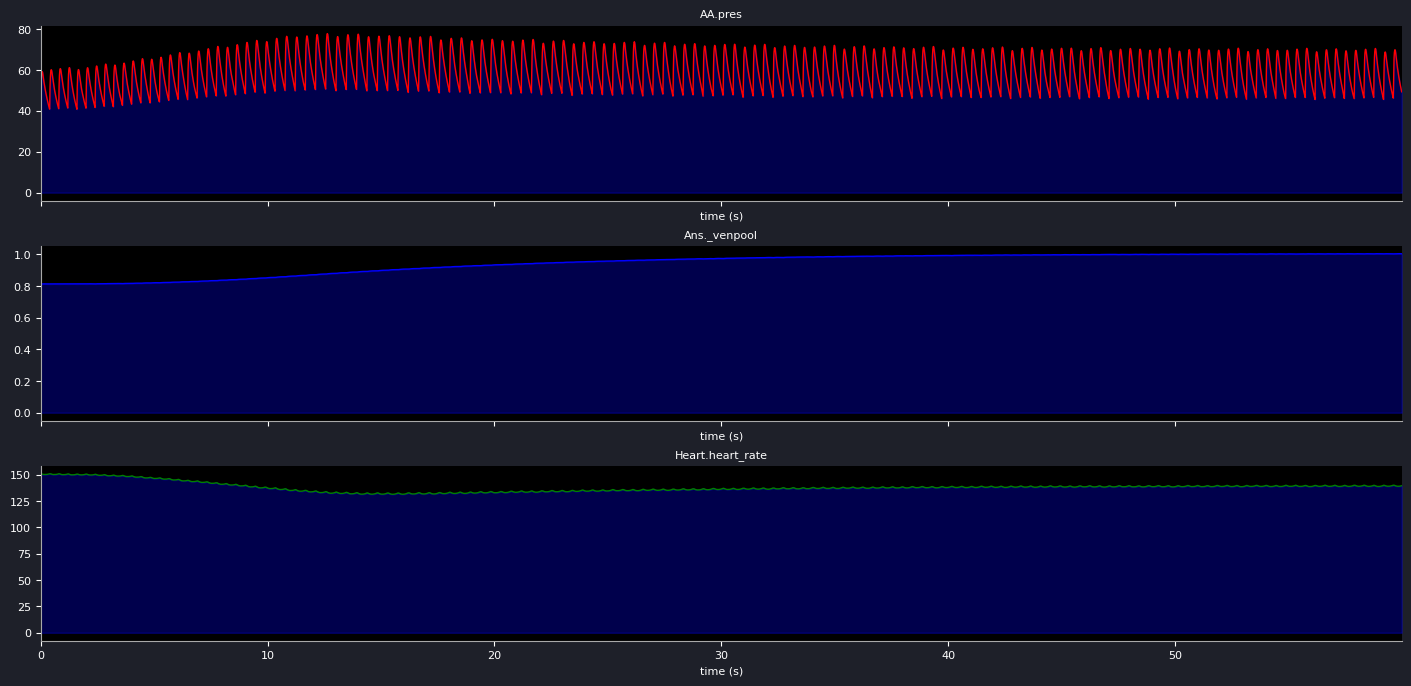


AA.pres         : max   77.71446, min    40.7584 mmHg
Ans._venpool    : max    1.00414 min    0.81243
Heart.heart_rate: max  151.00533 min  131.47401


In [4]:
models["Fluids"].add_volume(vol=40, in_time=10)
neo.plot_time_graph(["AA.pres", "Ans._venpool", "Heart.heart_rate"], combined=False, sharey=False, time_to_calculate=60, analyze=True)

Target data

Hemodynamic Studies of Induced Acute Hypo- and Hypervolemia in the Newborn Infant. Wallgren et al. Acta Pediatrica 53: 1-12 Jan. 1964


In [ ]:
neo.get_total_blood_volume()

In [ ]:
neo.plot_vitals(time_to_calculate=60)

In [ ]:
neo.ans(True)

In [ ]:
neo.analyze_heart()

In [ ]:
models["IVCE"].vol

In [8]:
neo.fastforward(120)

 Ready in 6.3 sec. Average model step in 0.0262 ms.


In [9]:
neo.get_vitals()


AA.pres         : max   70.31254, min   45.50811 mmHg
PA.pres         : max   41.31761, min   18.16663 mmHg
IVCI.pres       : max    2.72709, min    1.51794 mmHg


{'heartrate': 139.38791392156614,
 'spo2_pre': 97.57519476779112,
 'spo2_post': 97.28078873189921,
 'abp_systole': 70.31254,
 'abp_diastole': 45.50811,
 'pap_systole': 41.31761,
 'pap_diastole': 18.16663,
 'cvp': 1.920949695,
 'resp_rate': 40.566300020768516,
 'pH': 7.378250183303806,
 'po2': 95.74074013908321,
 'pco2': 44.74165241506423,
 'hco3': 26.042098607866535,
 'be': 0.3055335679502297}

In [ ]:
models['AA'].aboxy